<a href="https://colab.research.google.com/github/SyedUsman07/Pytorch-deeplearning/blob/main/Basic_NN_classification_model_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn ##its a nueral networks library within pytorch
import torch.nn.functional as F ##This allows us to move our data forward between nuerons

In [4]:
# Create a Model Class that inherits nn.Module
# Input layer (4 features of the flower)
# Hidden layer 1 (no of neurons)
# H2 (n)
# Output (3 classes of iris flower)

class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=8, out_features = 3):
    # in_features = 4 because we have 4 features (sepal lengty, width, height and diameter)
    # hidden layer 1 , 8 is just arbitary
    # output has 3 because we want to classify three things
    super().__init__()  #instantiate our nn.Module, which means the parent class is properly initiated before callimg for its sub classes
    self.fc1 = nn.Linear(in_features,h1) #fc1 = fully connected 1
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features) # # Thats how our nn will be structured

  def forward(self,x): ##Its a forward function to move our nuerons and data
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x




In [5]:
#Pick a manual seed for randomization
torch.manual_seed(41)
#Create an instance of Model
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
#Change last row from categorical to int
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

<ipython-input-9-8dcfc727ee27>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica',2.0)


In [10]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
# Train Test Split
X = my_df.drop('variety', axis =1)
Y = my_df['variety']

In [12]:
# Convert to numpy arrays
X = X.values
Y = Y.values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 41)

In [15]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [16]:
# Convert y labels to tensors long
# Long tensors are 64 bits integers, here we used it to convert our values from float to int like 0.0 to 0
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [17]:
# Set the criterion of model to meausre the error, how far off the prediction are from
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, Lr = learning rate (if error doesnt go down after a bunch of iterations or epochs, lower lr.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [18]:
# Train our model
# Epochs?
epochs = 100
losses = []
for i in range(epochs):
  # Go forwrad and get a prediction
  Y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss
  loss = criterion(Y_pred, Y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1318365335464478
Epoch: 10 and loss: 0.9658561944961548
Epoch: 20 and loss: 0.678993821144104
Epoch: 30 and loss: 0.4004894196987152
Epoch: 40 and loss: 0.2250950187444687
Epoch: 50 and loss: 0.12207333743572235
Epoch: 60 and loss: 0.07481686770915985
Epoch: 70 and loss: 0.05451279506087303
Epoch: 80 and loss: 0.044374920427799225
Epoch: 90 and loss: 0.03837944194674492


Text(0.5, 0, 'Epoch')

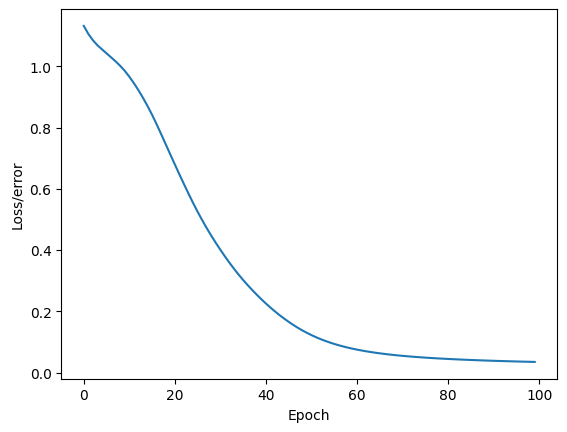

In [19]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")

In [27]:
# Evaluate our model with the test dataset
with torch.no_grad(): #Turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from test set, y_eval is prediction
  loss = criterion(y_eval, Y_test) # Find the loss of y_eval and y_test

In [23]:
loss

tensor(0.1458)

In [30]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

  # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {Y_test[i]}')

  # Correct or not
    if y_val.argmax().item() == Y_test[i]:
      correct +=1
print(f'We got {correct} correct!')

1.) tensor([-7.7212,  1.5826,  4.8685]) 	 2
2.) tensor([-10.2316,   0.5146,   8.7767]) 	 2
3.) tensor([-10.7282,   1.1893,   8.2408]) 	 2
4.) tensor([-4.4743,  3.5419, -1.1241]) 	 1
5.) tensor([-9.0954,  1.4687,  6.2899]) 	 2
6.) tensor([-2.2803,  3.7077, -4.1196]) 	 1
7.) tensor([-7.0740,  2.2070,  3.2966]) 	 2
8.) tensor([-4.2271,  3.6553, -1.5467]) 	 1
9.) tensor([-8.0707,  1.8280,  4.7897]) 	 2
10.) tensor([-10.8583,   0.5051,   9.3761]) 	 2
11.) tensor([-6.8676,  2.2165,  3.0859]) 	 2
12.) tensor([  9.4382,   3.2638, -18.8717]) 	 0
13.) tensor([  8.6037,   2.9307, -17.1502]) 	 0
14.) tensor([-1.0594,  3.1702, -4.7116]) 	 1
15.) tensor([  8.0310,   3.2450, -16.7844]) 	 0
16.) tensor([-6.7105,  2.4191,  2.6637]) 	 2
17.) tensor([  8.4678,   3.0888, -17.1317]) 	 0
18.) tensor([-7.6060,  1.7034,  4.5701]) 	 1
19.) tensor([  9.8628,   3.2141, -19.4757]) 	 0
20.) tensor([  7.7276,   2.8980, -15.7355]) 	 0
21.) tensor([-1.6920,  3.3949, -4.3016]) 	 1
22.) tensor([-10.0177,   1.0502,   7.